Nama: Findy Neyshella Sari

NPM: 23083010095

Kelas: Analisis Data Eksploratif(A)

# Memeriksa Data apakah ada Missing Value

In [29]:
import pandas as pd
data = pd.read_csv("D:/cs_studentss.csv",  sep = ";")
data.head()

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


In [31]:
import numpy as np
np.sum(data.isnull())

Student ID           0
Name                 0
Gender               0
Age                  0
GPA                  0
Major                0
Interested Domain    0
Projects             0
Future Career        0
Python               0
SQL                  0
Java                 0
dtype: int64

Tidak ditemukan Missing Value pada Data, jadi melanjutkan ke pembuatan Dummy pada Data

# Membuat Dummy pada Data

In [32]:
import pandas as pd
data = pd.read_csv("D:/cs_studentss.csv",  sep = ";")
data.head()

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


In [33]:
data = pd.get_dummies(data, columns = ['Interested Domain'], drop_first=True, prefix='InDo', dtype=int)
data.head()

,Student ID,Name,Gender,Age,GPA,Major,Projects,Future Career,Python,SQL,...,InDo_Information Retrieval,InDo_IoT (Internet of Things),InDo_Machine Learning,InDo_Mobile App Development,InDo_Natural Language Processing,InDo_Network Security,InDo_Quantum Computing,InDo_Software Development,InDo_Software Engineering,InDo_Web Development
0,1,John Smith,Male,21,3.5,Computer Science,Chatbot Development,Machine Learning Researcher,Strong,Strong,...,0,0,0,0,0,0,0,0,0,0
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Analytics,Data Scientist,Average,Strong,...,0,0,0,0,0,0,0,0,0,0
2,3,Robert Davis,Male,22,3.8,Computer Science,E-commerce Website,Software Engineer,Strong,Strong,...,0,0,0,0,0,0,0,1,0,0
3,4,Emily Wilson,Female,21,3.7,Computer Science,Full-Stack Web App,Web Developer,Weak,Strong,...,0,0,0,0,0,0,0,0,0,1
4,5,Michael Brown,Male,23,3.4,Computer Science,Network Security,Information Security Analyst,Average,Weak,...,0,0,0,0,0,0,0,0,0,0


Mengubah kolom 'Interested Domain' menjadi variabel dummy, di mana setiap kategori dalam kolom tersebut diubah menjadi kolom baru dengan nilai 0 atau 1.

# Memeriksa Data Outlier

In [34]:
import pandas as pd
data = pd.read_csv("D:/cs_studentss.csv",  sep = ";")
data.head()

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


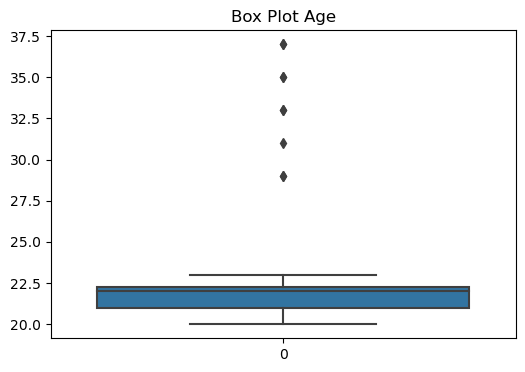

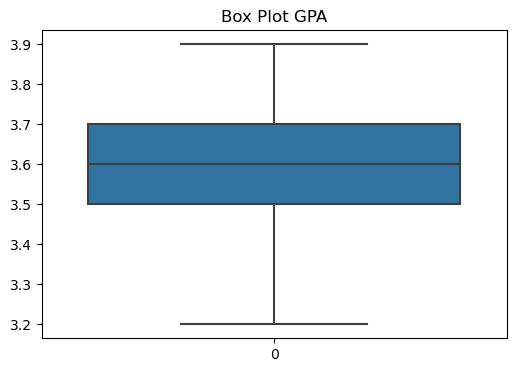

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

columns=['Age', 'GPA'] 

for col in columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data[col])
    plt.title(f'Box Plot {col}')
    plt.show()

Ditemukan data outlier pada kolom 'Age'

# Mengatasi Outlier pada kolom Age

Mengatasi Outlier dengan metode IQR

In [36]:
#Mengganti Outlier
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Age'] = data['Age'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

mengganti outlier tersebut dengan nilai lower_bound atau upper_bound, tergantung pada apakah mereka berada di bawah atau di atas rentang yang diizinkan.

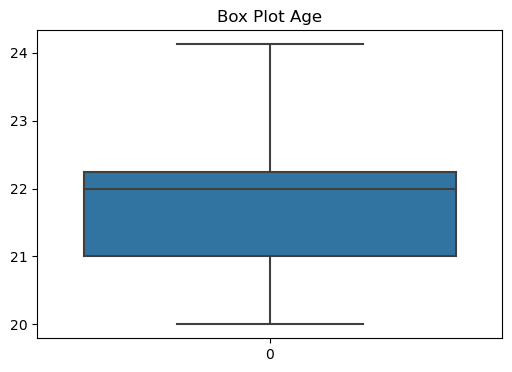

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

columns=['Age'] 

for col in columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data[col])
    plt.title(f'Box Plot {col}')
    plt.show()

#  Transformasi Data

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


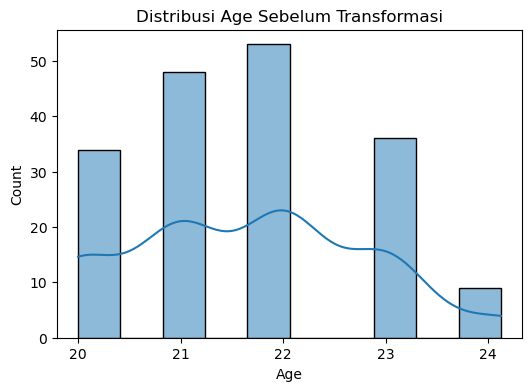

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


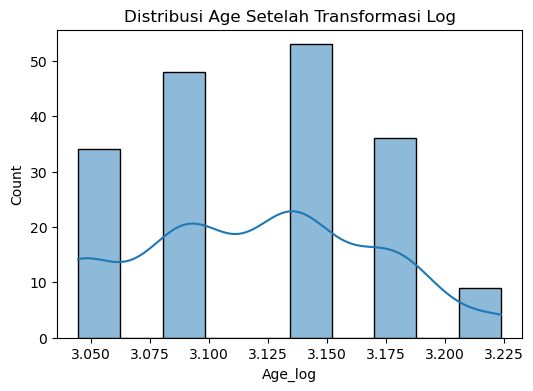

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi Sebelum Transformasi
plt.figure(figsize=(6,4))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Distribusi Age Sebelum Transformasi')
plt.show()

# Log Transformation
# Tambahkan 1 ke Age agar tidak ada nilai 0 (karena log(0) tidak terdefinisi)
data['Age_log'] = np.log(data['Age'] + 1)

# Visualisasi Setelah Transformasi
plt.figure(figsize=(6,4))
sns.histplot(data['Age_log'], bins=10, kde=True)
plt.title('Distribusi Age Setelah Transformasi Log')
plt.show()

Transformasi pada kolom 'Age' bertujuan untuk memperbaiki kualitas data, sehingga lebih sesuai untuk analisis dan modeling. Dengan mengurangi skewness, meminimalkan pengaruh outliers, dan mendekatkan distribusi pada normal, juga dapat meningkatkan hasil analisis dan prediksi yang dihasilkan dari model yang digunakan.